In [ ]:
import pandas as pd
from sklearn import tree
from sklearn import datasets
import seaborn as sns
import pydotplus
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pydotplus
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import TomekLinks

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/variable.xlsx")
df = df.dropna()
df = df.drop(['photo'], axis=1)
# df = df[df['result'] != 4]

X = df.drop(['result'], axis=1)
y = df["result"]

model_list = ('knn', 'SVM', 'Decision Tree', 'Random Forest')

acc_list = []

In [ ]:
df['result'].value_counts()

3.0    66
1.0    54
2.0    30
4.0     5
Name: result, dtype: int64

In [ ]:
# 標準化
scalex = preprocessing.scale(X)
X = pd.DataFrame(scalex, columns = ['fwhr','eye','eyebrow', 'facecurve', 'sym', 'eyebrow_length', 'eyebrow_distance', 'eye_h', 'eye_grad'])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.7)

X_test = X_test.sample(n = len(X_test) - len(X_train))
y_test = y_test.sample(n = len(y_test) - len(y_train))
X_test = pd.concat([X_test, X_train])
y_test = pd.concat([y_test, y_train])

# print(y_test.value_counts())

X_train, y_train = SMOTE(random_state=42, k_neighbors=2).fit_resample(X_train, y_train)
X_train, y_train = TomekLinks().fit_resample(X_train, y_train)

3.0    20
1.0    12
2.0    11
4.0     3
Name: result, dtype: int64


[Text(0, 0.5, 'D'), Text(0, 1.5, 'I'), Text(0, 2.5, 'S'), Text(0, 3.5, 'C')]

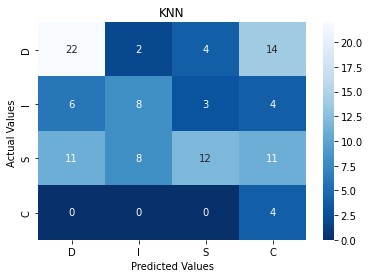

In [ ]:
# Knn

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = metrics.accuracy_score(y_test, y_pred)
acc_list.append(acc_knn)
cm_knn = confusion_matrix(y_test, y_pred)

cm_plot = sns.heatmap(cm_knn, annot=True, cmap = 'Blues_r')
cm_plot.set_xlabel('Predicted Values')
cm_plot.set_ylabel('Actual Values ')
cm_plot.set_title('KNN')
cm_plot.xaxis.set_ticklabels(['D', 'I', 'S', 'C'])
cm_plot.yaxis.set_ticklabels(['D', 'I', 'S', 'C'])

[Text(0, 0.5, 'D'), Text(0, 1.5, 'I'), Text(0, 2.5, 'S'), Text(0, 3.5, 'C')]

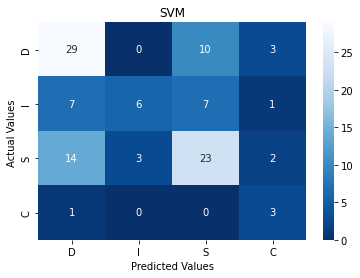

In [ ]:
# SVM

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svm = metrics.accuracy_score(y_test, y_pred)
acc_list.append(acc_svm)
cm_svm = confusion_matrix(y_test, y_pred)

cm_plot = sns.heatmap(cm_svm, annot=True, cmap = 'Blues_r')
cm_plot.set_xlabel('Predicted Values')
cm_plot.set_ylabel('Actual Values ')
cm_plot.set_title('SVM')
cm_plot.xaxis.set_ticklabels(['D', 'I', 'S', 'C'])
cm_plot.yaxis.set_ticklabels(['D', 'I', 'S', 'C'])

[Text(0, 0.5, 'D'), Text(0, 1.5, 'I'), Text(0, 2.5, 'S'), Text(0, 3.5, 'C')]

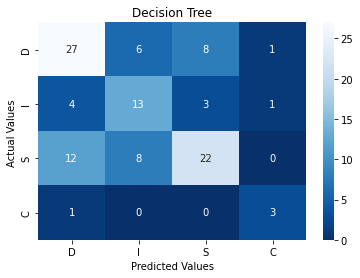

In [ ]:
# Decision Tree

dtc = tree.DecisionTreeClassifier(criterion = 'entropy').fit(X_train, y_train)
y_pred = dtc.predict(X_test)
acc_dtc = metrics.accuracy_score(y_test, y_pred)
acc_list.append(acc_dtc)
cm_dtc = confusion_matrix(y_test, y_pred)

cm_plot = sns.heatmap(cm_dtc, annot=True, cmap = 'Blues_r')
cm_plot.set_xlabel('Predicted Values')
cm_plot.set_ylabel('Actual Values ')
cm_plot.set_title('Decision Tree')
cm_plot.xaxis.set_ticklabels(['D', 'I', 'S', 'C'])
cm_plot.yaxis.set_ticklabels(['D', 'I', 'S', 'C'])

[Text(0, 0.5, 'D'), Text(0, 1.5, 'I'), Text(0, 2.5, 'S'), Text(0, 3.5, 'C')]

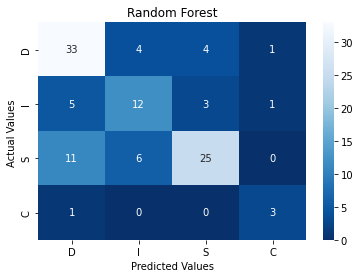

In [ ]:
# Randon Forest

rfc = RandomForestClassifier(criterion = 'entropy')
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
acc_rfc = metrics.accuracy_score(y_test, y_pred)
acc_list.append(acc_rfc)
cm_rfc = confusion_matrix(y_test, y_pred)

cm_plot = sns.heatmap(cm_rfc, annot=True, cmap = 'Blues_r')
cm_plot.set_xlabel('Predicted Values')
cm_plot.set_ylabel('Actual Values ')
cm_plot.set_title('Random Forest')
cm_plot.xaxis.set_ticklabels(['D', 'I', 'S', 'C'])
cm_plot.yaxis.set_ticklabels(['D', 'I', 'S', 'C'])

In [ ]:
# Model, Accuracy 
result_df = pd.DataFrame({'Model' :model_list, 'Accuracy' : acc_list})
result_df

,Model,Accuracy
0,knn,0.422018
1,SVM,0.559633
2,Decision Tree,0.596330
3,Random Forest,0.669725
